### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf
from keras.datasets import fashion_mnist,cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import BatchNormalization,Reshape,Dense,Dropout,Flatten

#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
(Xtrain,Ytrain),(Xtest,Ytest)=fashion_mnist.load_data()

In [60]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

#### Change train and test labels into one-hot vectors

In [0]:
Ytrain=tf.keras.utils.to_categorical(Ytrain,num_classes=10)
Ytest=tf.keras.utils.to_categorical(Ytest,num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
model=Sequential()
Xtrain=Xtrain/255
Xtest=Xtest/255

In [0]:
Xtrain=Xtrain.reshape(60000,28,28,1)
Xtest=Xtest.reshape(10000,28,28,1)

In [64]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape


((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model.add(Dense(200,activation='relu',input_shape=(28,28,1)))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [75]:
model.add(Flatten())
model.add(Dense(10,activation='softmax',))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 28, 28, 200)       400       
_________________________________________________________________
dense_20 (Dense)             (None, 28, 28, 100)       20100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 100)       0         
_________________________________________________________________
dense_21 (Dense)             (None, 28, 28, 10)        1010      
_________________________________________________________________
dense_22 (Dense)             (None, 28, 28, 10)        110       
_________________________________________________________________
dense_23 (Dense)             (None, 28, 28, 10)        110       
_________________________________________________________________
dense_24 (Dense)             (None, 28, 28, 10)        110       
__________

In [76]:
model.fit(Xtrain,Ytrain,batch_size=32,nb_epoch=10,validation_data=(Xtest, Ytest))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 420us/step - loss: 1.0671 - acc: 0.6102 - val_loss: 0.5130 - val_acc: 0.8192
Epoch 2/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.4424 - acc: 0.8387 - val_loss: 0.4704 - val_acc: 0.8302
Epoch 3/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.4156 - acc: 0.8476 - val_loss: 0.4624 - val_acc: 0.8419
Epoch 4/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.4031 - acc: 0.8548 - val_loss: 0.4451 - val_acc: 0.8391
Epoch 5/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.3918 - acc: 0.8586 - val_loss: 0.4802 - val_acc: 0.8274
Epoch 6/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.3792 - acc: 0.8642 - val_loss: 0.4368 - val_acc: 0.8472
Epoch 7/10
60000/60000 [==============================] - 22s 363us/step - loss: 0.3727 - acc: 0.8659 - val_loss: 0.

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator


### **Load CIFAR10 dataset**

In [0]:
(Xtrain2,Ytrain2),(Xtest2,Ytest2)=cifar10.load_data()

In [115]:
Xtrain2.shape,Ytrain2.shape,Xtest2.shape,Ytest2.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
Ytrain2=tf.keras.utils.to_categorical(Ytrain2,num_classes=10)
Ytest2=tf.keras.utils.to_categorical(Ytest2,num_classes=10)
Xtrain2=Xtrain2/255
Xtest2=Xtest2/255

In [117]:
Xtrain2.shape,Ytrain2.shape,Xtest2.shape,Ytrain2.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (50000, 10))

In [121]:
model2=Sequential()
model2.add(Dense(200,activation='relu',input_shape=(32,32,3)))
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(200,activation='relu',input_shape=(32,32,3)))
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(10,activation='softmax',))

model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32, 32, 200)       800       
_________________________________________________________________
dense_44 (Dense)             (None, 32, 32, 100)       20100     
_________________________________________________________________
dropout_12 (Dropout)         (None, 32, 32, 100)       0         
_________________________________________________________________
dense_45 (Dense)             (None, 32, 32, 200)       20200     
_________________________________________________________________
dense_46 (Dense)             (None, 32, 32, 100)       20100     
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 100)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 102400)            0         
__________

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
datagen.fit(Xtrain2)

### **Prepare/fit the generator.**

In [125]:
model2.fit_generator(datagen.flow(Xtrain2,Ytrain2,batch_size=32),
                     samples_per_epoch=Xtrain2.shape[0],
                     nb_epoch=20
                     ,
                     validation_data=(Xtest2, Ytest2))

Epoch 1/20
   5/1562 [..............................] - ETA: 51s - loss: 1.7224 - acc: 0.3937

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=1562, epochs=20)`
  """


1562/1562 [==============================] - 36s 23ms/step - loss: 1.5503 - acc: 0.4493 - val_loss: 1.4507 - val_acc: 0.4859
Epoch 2/20
1562/1562 [==============================] - 36s 23ms/step - loss: 1.5497 - acc: 0.4514 - val_loss: 1.4712 - val_acc: 0.4776
Epoch 3/20
1562/1562 [==============================] - 35s 23ms/step - loss: 1.5430 - acc: 0.4519 - val_loss: 1.4794 - val_acc: 0.4769
Epoch 4/20
1562/1562 [==============================] - 36s 23ms/step - loss: 1.5403 - acc: 0.4560 - val_loss: 1.4695 - val_acc: 0.4810
Epoch 5/20
1562/1562 [==============================] - 35s 23ms/step - loss: 1.5399 - acc: 0.4559 - val_loss: 1.4667 - val_acc: 0.4825
Epoch 6/20
1562/1562 [==============================] - 35s 23ms/step - loss: 1.5382 - acc: 0.4572 - val_loss: 1.4433 - val_acc: 0.4915
Epoch 7/20
1562/1562 [==============================] - 35s 23ms/step - loss: 1.5362 - acc: 0.4584 - val_loss: 1.4694 - val_acc: 0.4828
Epoch 8/20
1562/1562 [==============================] - 35s

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

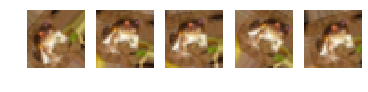

In [126]:
from matplotlib import pyplot as plt
gen = datagen.flow(Xtrain2[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()